# Principal Component Analysis (PCA)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
mean_01 = np.array([0.0,0.0])
cov_01 = np.array([[1.0,1.3], [1.3,1.5]])

data = np.random.multivariate_normal(mean_01,cov_01,800)
print(data.shape)

(800, 2)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  after removing the cwd from sys.path.


/home/rishi/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


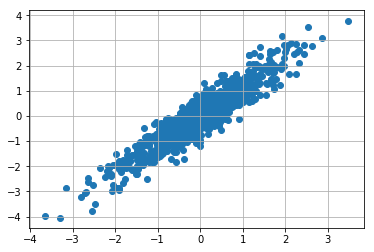

In [3]:
plt.figure(0)
plt.grid("on")
plt.scatter(data[:,0], data[:,1])
plt.show()

In [4]:
def pca(X, k=None):
    if k is None:
        k = X.shape[1]
    
    # Covariance of X
    A = np.cov(X.T)  # assumes n as 1st dimension
    
    # Eigenvalues and Eigenvectors
    eg_val,eg_vec = np.linalg.eig(A)
    
    return eg_val,eg_vec   

In [5]:
lam, P = pca(data)
print(lam.shape, P.shape)

(2,) (2, 2)


In [6]:
print(lam)
print(P)

[0.07767487 2.42582878]
[[-0.76750799 -0.64103938]
 [ 0.64103938 -0.76750799]]


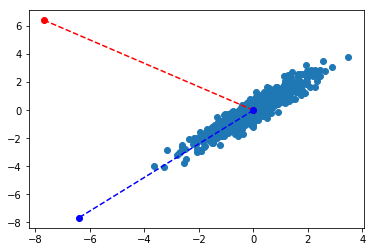

In [7]:
plt.figure(0)
plt.scatter(data[:,0],data[:,1])
# plt.plot([x1,x2],[y1,y2])
plt.plot([0,10*P[0,0]],[0,10*P[1,0]], 'ro--',)
plt.plot([0,10*P[0,1]],[0,10*P[1,1]], 'bo--')
plt.show()

In [8]:
# explained_variance along PC1
var_pc1 = lam[1]/(lam[0]+lam[1])
print(var_pc1)

0.9689735327469986


In [9]:
Z = data.dot(P)
print(Z.shape)
print(Z[:10])

(800, 2)
[[ 0.43571398 -0.55029854]
 [ 0.25914668 -0.33343225]
 [ 0.35904528  1.37221457]
 [-0.09033628  0.65879879]
 [-0.13287071 -1.65525963]
 [ 0.02540634  0.69976688]
 [-0.26857145 -0.43037347]
 [ 0.3121455  -2.43909508]
 [-0.47829586  1.46954123]
 [-0.40056734  1.14280359]]


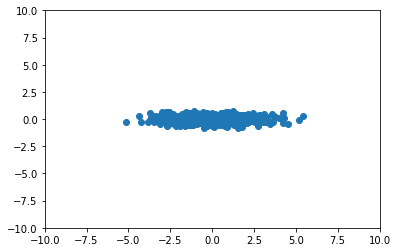

In [10]:
plt.figure(0)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.scatter(Z[:,1],Z[:,0]) # PC1 = ev2, PC2 = ev1
plt.show()